In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Limpieza de datos

In [3]:
df_demo = pd.read_csv('df_final_demo.csv')
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
df_demo.isnull().any(axis=1).sum()

15

In [5]:
df_demo = df_demo.dropna()
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)
df_demo

C:\Users\bruno\AppData\Local\Temp\ipykernel_27384\4079634363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0


In [47]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age              int32
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [7]:
df_experiment_clients = pd.read_csv('df_final_experiment_clients.csv')
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [8]:
df_experiment_clients = df_experiment_clients.rename(columns={'Variation': 'variation'})
df_experiment_clients

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
df_experiment_clients = df_experiment_clients.dropna()
df_experiment_clients

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [10]:
df_experiment_clients.isnull().any(axis=1).sum()

0

In [13]:
df_experiment_clients.dtypes

client_id     int64
variation    object
dtype: object

In [11]:
df_web_data1 = pd.read_csv('df_final_web_data_pt_1.csv')
df_web_data1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [54]:
df_web_data1.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [12]:
df_web_data2 = pd.read_csv('df_final_web_data_pt_2.csv')
df_web_data2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [16]:
df_web_data2.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [13]:
# concatenar las tablas web data

df_web_data = pd.concat([df_web_data1, df_web_data2], ignore_index=True)
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [14]:
df_web_data.isnull().any(axis=1).sum()

0

In [15]:
df_demo['client_id'] = df_demo['client_id'].astype(int)
df_experiment_clients['client_id'] = df_experiment_clients['client_id'].astype(int)
df_web_data['client_id'] = df_web_data['client_id'].astype(int)

C:\Users\bruno\AppData\Local\Temp\ipykernel_27384\2350653235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['client_id'] = df_demo['client_id'].astype(int)
C:\Users\bruno\AppData\Local\Temp\ipykernel_27384\2350653235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experiment_clients['client_id'] = df_experiment_clients['client_id'].astype(int)


## Nuevo merge

In [16]:
# Realizar el merge usando el tipo de unión 'left'
df_merged1 = df_experiment_clients.merge(df_web_data, on='client_id', how='left')
df_merged1.dropna(subset=['variation'], inplace=True)
df_merged1.shape

(321309, 6)

In [17]:
df_final = df_merged1.merge(df_demo, on='client_id', how='left')

In [22]:
df_final.columns

Index(['client_id', 'variation', 'visitor_id', 'visit_id', 'process_step',
       'date_time', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [35]:
df_final.dropna(subset=['clnt_age'], inplace=True)
df_final['clnt_age'].isnull().sum()

0

In [31]:
# Filtrar los valores de tipo float y convertirlos a enteros
df_final[df_final['clnt_age'].apply(lambda x: isinstance(x, float))]['clnt_age'].astype('int')



df_final

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
df_final[df_final['variation'] == 'Test']

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0


# Exploración de datos

In [65]:
df_demo_gendr = df_demo['gendr'].value_counts()
df_demo_gendr

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

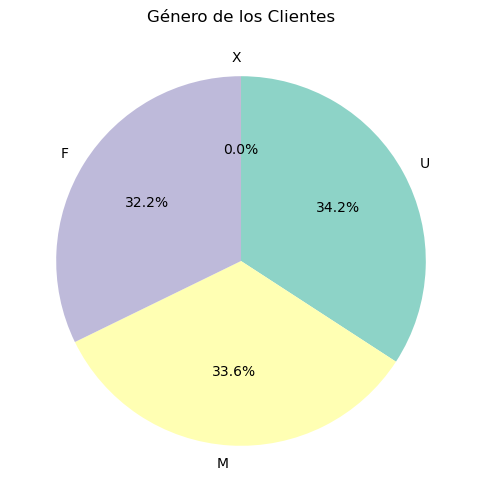

In [66]:
# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_demo_gendr, labels=df_demo_gendr.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('Género de los Clientes')
plt.show()

In [67]:
max_clnt_age = df_demo['clnt_age'].max()
min_clnt_age = df_demo['clnt_age'].min()

max_clnt_age, min_clnt_age

(96, 13)

In [68]:
mean_clnt_age = int(round(df_demo['clnt_age'].mean()))
median_clnt_age = int(round(df_demo['clnt_age'].median()))
mode_clnt_age = df_demo['clnt_age'].mode()

mean_clnt_age, median_clnt_age, int(mode_clnt_age.values)

C:\Users\bruno\AppData\Local\Temp\ipykernel_32536\1395903998.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean_clnt_age, median_clnt_age, int(mode_clnt_age.values)


(46, 47, 57)

In [69]:
# calculamos la raiz cuadrada de la población, para hacer el histograma
raiz = int(70608 ** (1/2))
raiz

265

<Axes: xlabel='clnt_age', ylabel='Count'>

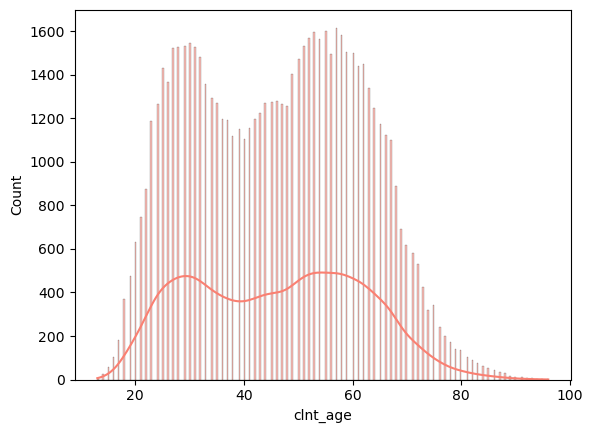

In [70]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=raiz, color="salmon")

In [71]:
max_num_accts = df_demo['num_accts'].max()
min_num_accts = df_demo['num_accts'].min()

max_num_accts, min_num_accts

(8.0, 1.0)

In [72]:
df_demo_num_accts = df_demo['num_accts'].value_counts()
df_demo_num_accts

num_accts
2.0    55496
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

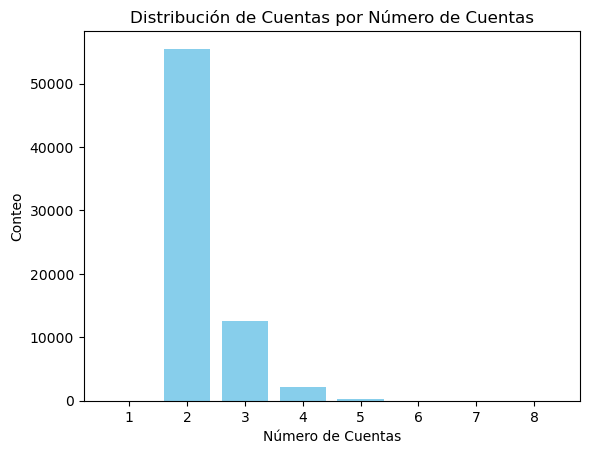

In [73]:

# Ordenar el dataframe por num_accts
#df.sort_values(by='num_accts', inplace=True)

# Crear el gráfico
plt.bar(df_demo_num_accts.index, df_demo_num_accts.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Número de Cuentas')
plt.ylabel('Conteo')
plt.title('Distribución de Cuentas por Número de Cuentas')

# Mostrar el gráfico
plt.show()


In [74]:
df_experiment_clients_variation = df_experiment_clients.value_counts('variation')
df_experiment_clients_variation

variation
Test       26968
Control    23532
Name: count, dtype: int64

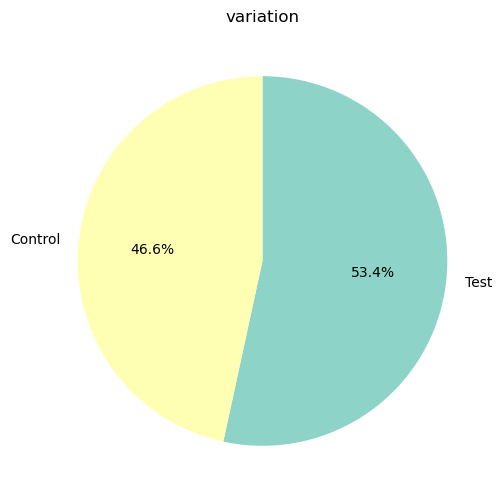

In [75]:
# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_experiment_clients_variation, labels=df_experiment_clients_variation.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('variation')
plt.show()

In [24]:
df_web_data_process_step = df_web_data.value_counts('process_step')
df_web_data_process_step

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

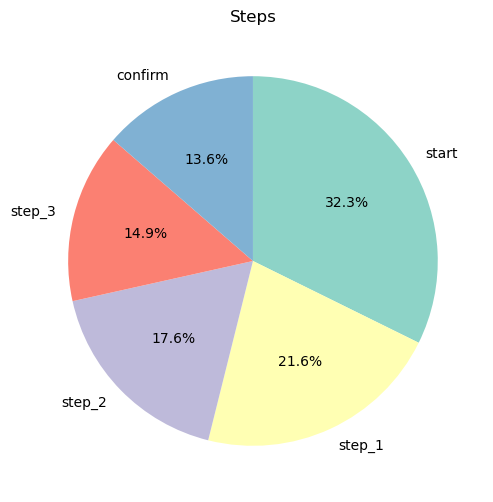

In [25]:
# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_web_data_process_step, labels=df_web_data_process_step.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('Steps')
plt.show()

In [31]:
raiz_final = int(321309 ** (1/2))
raiz_final 

566

In [32]:
raiz_demo = int(70609 ** (1/2))
raiz_demo

265

<Axes: xlabel='bal', ylabel='Count'>

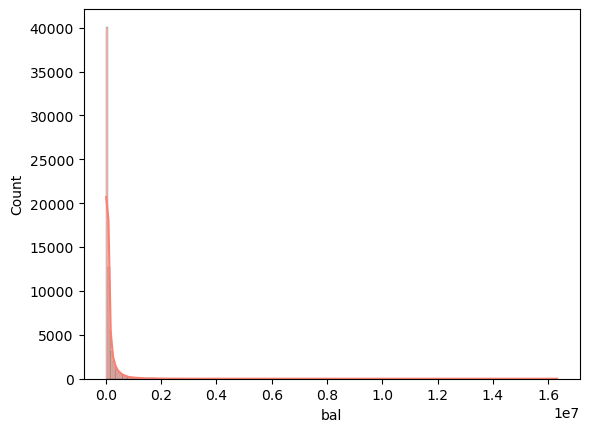

In [36]:
sns.histplot(df_demo['bal'], kde=True, bins=raiz_demo, color="salmon")

# Análisis de edad, balance y variación

In [56]:
q1 = df_final['bal'].quantile(0.25)
q3 = df_final['bal'].quantile(0.75)
rango_inter_bal = round(q3 - q1, 2)
rango_inter_bal

110434.1

In [62]:
q1 = df_final['clnt_tenure_yr'].quantile(0.25)
q3 = df_final['clnt_tenure_yr'].quantile(0.75)
rango_inter_bal = round(q3 - q1, 2)
rango_inter_bal

10.0

In [57]:
outliers_bal = q3 + rango_inter_bal * 1.5
outliers_bal

317144.12

In [63]:
outliers_tenure = q3 + rango_inter_bal * 1.5
outliers_tenure

31.0

<Axes: ylabel='bal'>

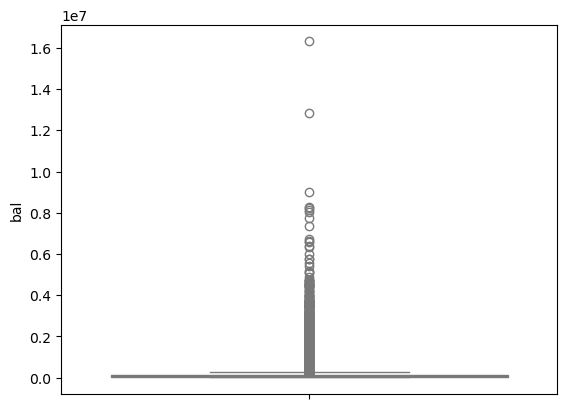

In [105]:
sns.boxplot(data = df_demo['bal'], color="lightblue")

In [42]:
df_outliers = df_final[df_final['bal'] > outliers_bal]
df_outliers

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
56,6651403,Control,387438258_49845138949,754106292_61370647593_160929,confirm,2017-04-04 17:38:39,13.0,162.0,56.0,M,2.0,324712.88,4.0,7.0
57,6651403,Control,387438258_49845138949,754106292_61370647593_160929,step_3,2017-04-04 17:34:03,13.0,162.0,56.0,M,2.0,324712.88,4.0,7.0
58,6651403,Control,387438258_49845138949,754106292_61370647593_160929,step_2,2017-04-04 17:33:55,13.0,162.0,56.0,M,2.0,324712.88,4.0,7.0
59,6651403,Control,387438258_49845138949,754106292_61370647593_160929,step_3,2017-04-04 17:31:32,13.0,162.0,56.0,M,2.0,324712.88,4.0,7.0
60,6651403,Control,387438258_49845138949,754106292_61370647593_160929,step_2,2017-04-04 17:28:44,13.0,162.0,56.0,M,2.0,324712.88,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321094,6428716,Control,560491570_1499365439,104222319_64628836240_918404,step_2,2017-04-08 15:58:28,24.0,299.0,50.0,M,3.0,493237.27,1.0,5.0
321095,6428716,Control,560491570_1499365439,104222319_64628836240_918404,step_1,2017-04-08 15:57:46,24.0,299.0,50.0,M,3.0,493237.27,1.0,5.0
321096,6428716,Control,560491570_1499365439,104222319_64628836240_918404,start,2017-04-08 15:57:18,24.0,299.0,50.0,M,3.0,493237.27,1.0,5.0
321246,8730282,Control,207079190_70980466142,447063016_91750701649_632942,start,2017-04-13 11:23:20,27.0,334.0,50.0,F,3.0,464879.31,2.0,5.0


In [114]:
df_demo[df_demo['bal'] > outliers_bal]['bal']

7         522498.72
8         299388.72
9         382303.83
21       2768726.87
37        439723.43
            ...    
70593     319382.04
70595     482000.12
70598     493497.05
70604    1411062.68
70607     475114.69
Name: bal, Length: 8018, dtype: float64

In [ ]:
raiz2 = 42

<Axes: xlabel='bal', ylabel='Count'>

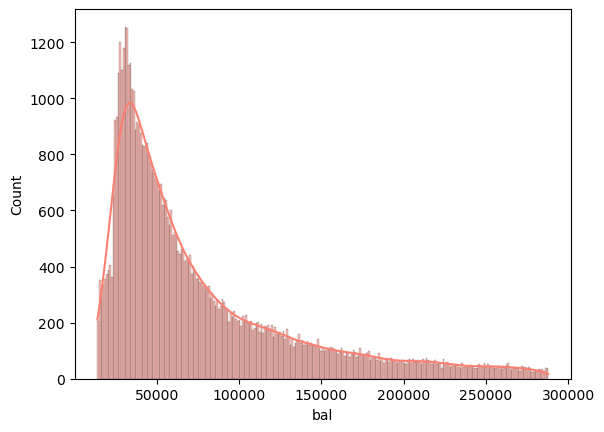

In [37]:
sns.histplot(df_demo[df_demo['bal'] < outliers_bal]['bal'], kde=True, bins=raiz_demo, color="salmon")

In [74]:
df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Test')]['bal']

0         189023.86
1         189023.86
2         189023.86
3         189023.86
4         189023.86
            ...    
321304     93103.47
321305     93103.47
321306     93103.47
321307     93103.47
321308     93103.47
Name: bal, Length: 157566, dtype: float64

In [77]:
df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Control')]['bal']

20        142642.26
21        142642.26
22        142642.26
23        142642.26
24        142642.26
            ...    
321265     60344.67
321266    141808.05
321267    141808.05
321268    141808.05
321269    141808.05
Name: bal, Length: 127190, dtype: float64

<Axes: xlabel='bal', ylabel='Count'>

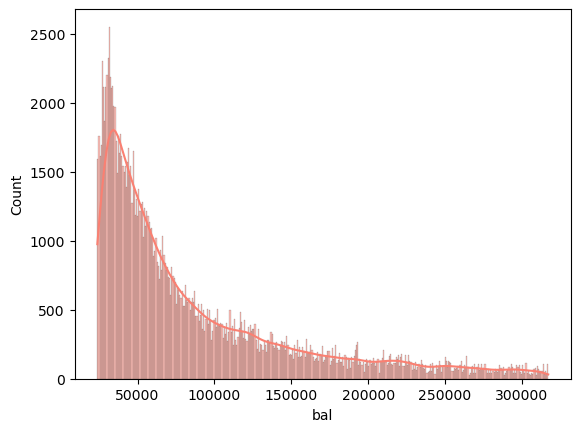

In [76]:
sns.histplot(df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Test')]['bal'], kde=True, bins=int(157_566 ** (1/2)), color="salmon")

<Axes: xlabel='bal', ylabel='Count'>

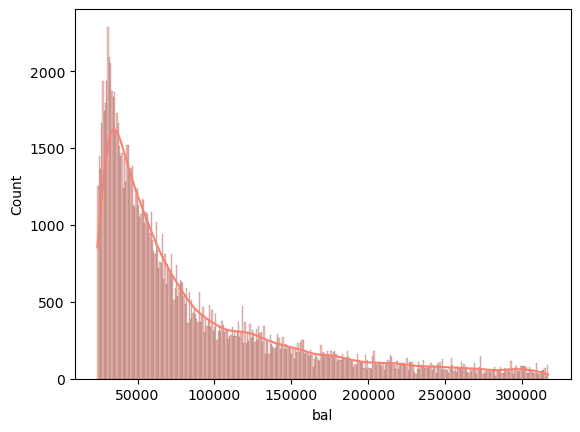

In [78]:
sns.histplot(df_final[(df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Control')]['bal'], kde=True, bins=int(127_190 ** (1/2)), color="salmon")

In [61]:
df_bal_test_small = df_final[(df_final['bal'] < 70_000) & (df_final['variation'] == 'Test')]['bal']
df_bal_test_small

15        36001.9
16        36001.9
17        36001.9
18        36001.9
19        36001.9
           ...   
321295    61349.7
321296    61349.7
321297    61349.7
321298    61349.7
321299    61349.7
Name: bal, Length: 89659, dtype: float64

In [70]:
df_bal_control_small = df_final[(df_final['bal'] < 70_000) & (df_final['variation'] == 'Control')]['bal']
df_bal_control_small

40        34254.54
41        34254.54
81        39795.28
82        39795.28
83        39795.28
            ...   
321261    60344.67
321262    60344.67
321263    60344.67
321264    60344.67
321265    60344.67
Name: bal, Length: 72634, dtype: float64

In [85]:
df_bal_test_small = df_final[df_final['variation'] == 'Test']['bal'].sort_values().iloc[0:51697]
df_bal_test_small


226892    23789.44
226891    23789.44
226890    23789.44
226889    23789.44
226888    23789.44
            ...   
251026    44514.49
251024    44514.49
251022    44514.49
251023    44514.49
148586    44515.18
Name: bal, Length: 51697, dtype: float64

In [57]:
df_bal_test_medium = df_final[(df_final['bal'] > 25_000) & (df_final['bal'] < 125_000)  & (df_final['variation'] == 'Test')]['bal']
df_bal_test_medium

15        36001.90
16        36001.90
17        36001.90
18        36001.90
19        36001.90
            ...   
321304    93103.47
321305    93103.47
321306    93103.47
321307    93103.47
321308    93103.47
Name: bal, Length: 121428, dtype: float64

In [87]:
df_bal_test_medium = df_final[df_final['variation'] == 'Test']['bal'].sort_values().iloc[51698:103395]
df_bal_test_medium

148584    44515.18
148581    44515.18
148582    44515.18
148583    44515.18
287828    44517.64
            ...   
50095     86430.45
50094     86430.45
50093     86430.45
50092     86430.45
50091     86430.45
Name: bal, Length: 51697, dtype: float64

In [73]:
51697 + 51697

103394

In [43]:
df_bal_test_large = df_final[(df_final['bal'] > 70_000) & (df_final['bal'] < outliers_bal) & (df_final['variation'] == 'Test')]['bal']
df_bal_test_large

0         189023.86
1         189023.86
2         189023.86
3         189023.86
4         189023.86
            ...    
321304     93103.47
321305     93103.47
321306     93103.47
321307     93103.47
321308     93103.47
Name: bal, Length: 65432, dtype: float64

In [88]:
df_bal_test_large = df_final[df_final['variation'] == 'Test']['bal'].sort_values().iloc[103395:155092]
df_bal_test_large

50090      86430.45
50089      86430.45
152300     86437.53
152306     86437.53
152305     86437.53
            ...    
287681    287696.13
287680    287696.13
287695    287696.13
287699    287696.13
91634     287870.18
Name: bal, Length: 51697, dtype: float64

In [78]:
51697 * 3

155091

In [53]:
df_final['clnt_tenure_yr']

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
321304    4.0
321305    4.0
321306    4.0
321307    4.0
321308    4.0
Name: clnt_tenure_yr, Length: 321195, dtype: float64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

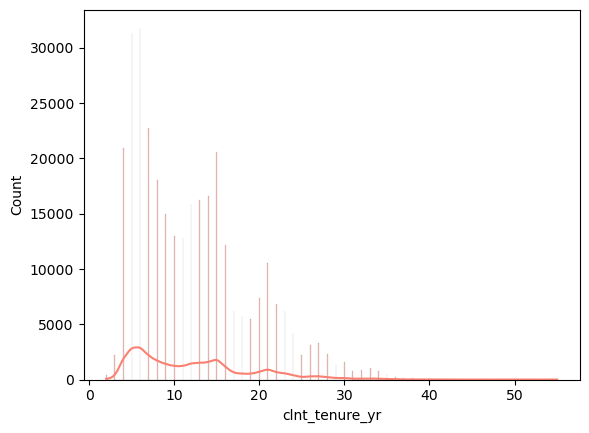

In [55]:
sns.histplot(df_final['clnt_tenure_yr'], kde=True, bins=int(321_195 ** (1/2)), color="salmon")

In [64]:
df_final[df_final['clnt_tenure_yr'] < outliers_tenure]['clnt_tenure_yr']

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
321304    4.0
321305    4.0
321306    4.0
321307    4.0
321308    4.0
Name: clnt_tenure_yr, Length: 316201, dtype: float64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

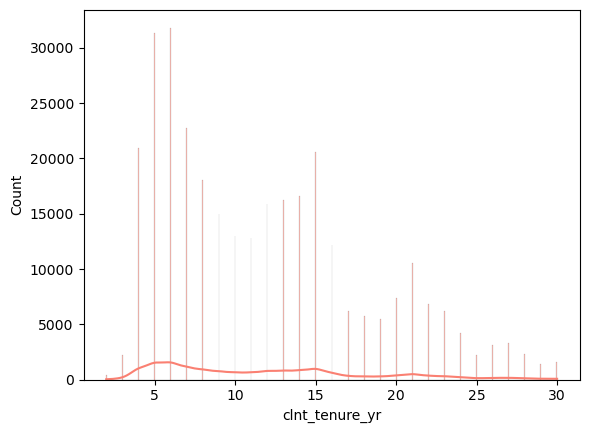

In [65]:
sns.histplot(df_final[df_final['clnt_tenure_yr'] < outliers_tenure]['clnt_tenure_yr'], kde=True, bins=int(316_201 ** (1/2)), color="salmon")

<Axes: xlabel='bal', ylabel='Count'>

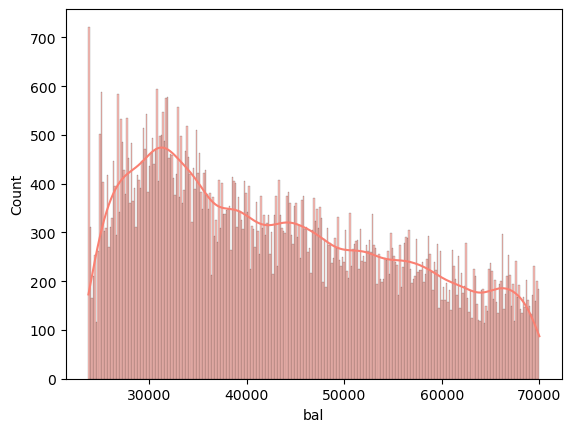

In [44]:
sns.histplot(df_bal_test_small, kde=True, bins=int(89659 ** (1/2)), color="salmon")

<Axes: xlabel='bal', ylabel='Count'>

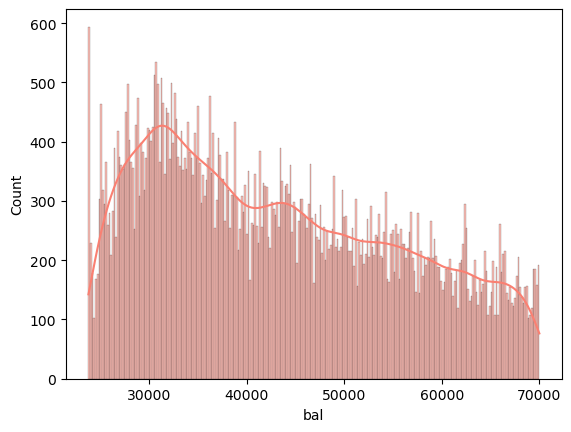

In [71]:
sns.histplot(df_bal_control_small, kde=True, bins=int(72634 ** (1/2)), color="salmon")                                         

Text(0.5, 1.0, 'Box-Cox Transformed bal-test-small')

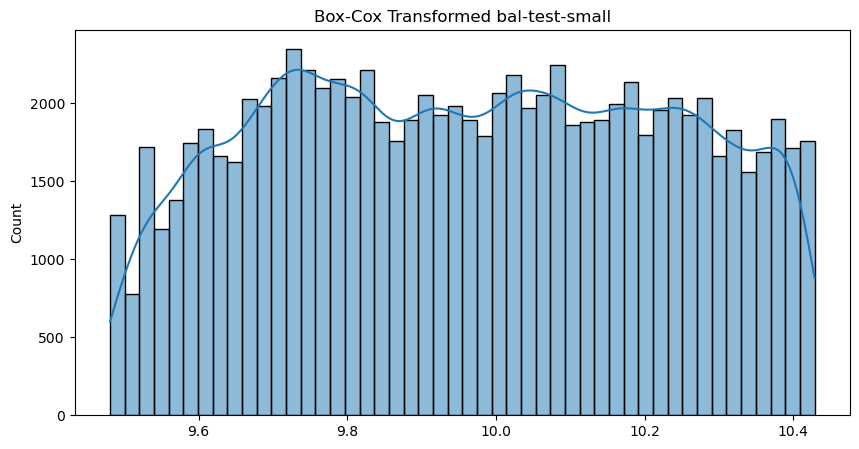

In [48]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox, _ = boxcox(df_bal_test_small)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed bal-test-small')

Text(0.5, 1.0, 'Box-Cox Transformed bal-test-large')

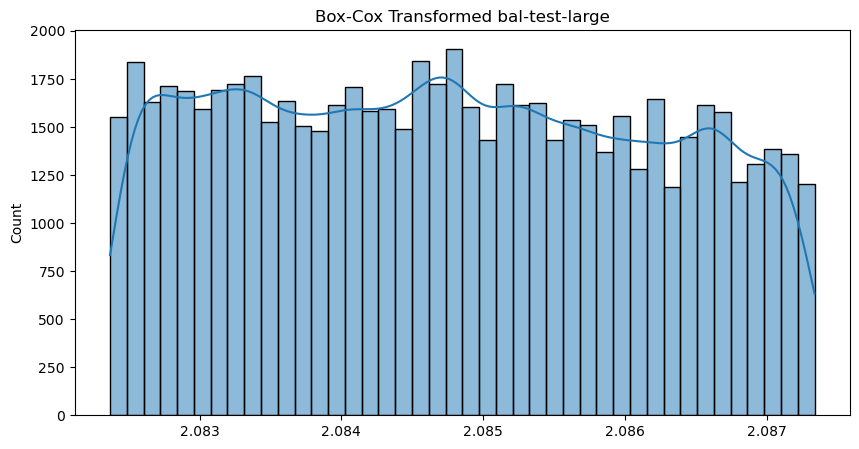

In [46]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox, _ = boxcox(df_bal_test_large)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed bal-test-large')

In [83]:
from scipy.stats import ks_2samp

# Prueba K-S
ks_stat, p_value = ks_2samp(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'], df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'])

print(f"Estadístico K-S: {ks_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las poblaciones tienen distribuciones diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las distribuciones son diferentes.")

Estadístico K-S: 0.0075
p-valor: 0.0007
Rechazamos la hipótesis nula: Las poblaciones tienen distribuciones diferentes.


In [84]:
from scipy.stats import expon

# Ajustar distribución exponencial a cada población
lambda1 = 1 / np.mean(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'])
lambda2 = 1 / np.mean(df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'])

print(f"Parámetro lambda (Población 1): {lambda1:.4f}")
print(f"Parámetro lambda (Población 2): {lambda2:.4f}")

# Comparación de parámetros
if np.isclose(lambda1, lambda2, rtol=0.1):
    print("Los parámetros lambda son similares; las poblaciones podrían provenir de la misma distribución.")
else:
    print("Los parámetros lambda son diferentes; las poblaciones podrían no provenir de la misma distribución.")

Parámetro lambda (Población 1): 0.0000
Parámetro lambda (Población 2): 0.0000
Los parámetros lambda son similares; las poblaciones podrían provenir de la misma distribución.


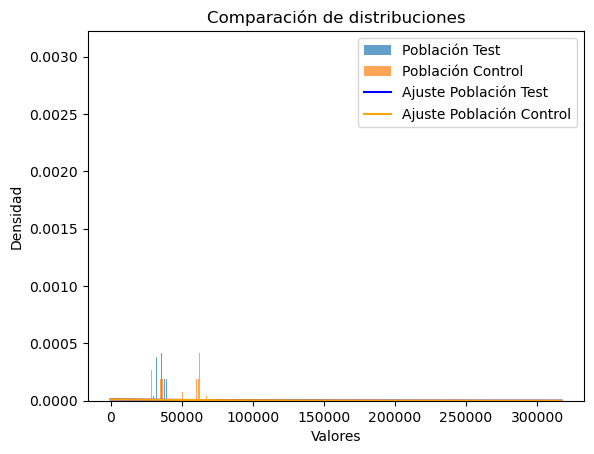

In [87]:
import matplotlib.pyplot as plt

# Graficar histogramas
plt.hist(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < 70_000)]['bal'], bins=157_566, alpha=0.7, label="Población Test", density=True)
plt.hist(df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < 70_000)]['bal'], bins=127_190, alpha=0.7, label="Población Control", density=True)

# Añadir las curvas ajustadas
x = np.linspace(0, np.max([df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'].max(), df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < outliers_bal)]['bal'].max()]), 1000)
plt.plot(x, lambda1 * np.exp(-lambda1 * x), label="Ajuste Población Test", color='blue')
plt.plot(x, lambda2 * np.exp(-lambda2 * x), label="Ajuste Población Control", color='orange')

plt.legend()
plt.title("Comparación de distribuciones")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.show()

In [68]:
import numpy as np
from scipy.stats import chi2_contingency

# Datos: Tabla de contingencia (frecuencias observadas)
observed = np.array([df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < 70_000)]['bal'],   
                     df_final[(df_final['variation'] == 'Control') & (df_final['bal'] < 70_000)]['bal']]) 

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(observed)

# Resultados
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: Las variables no son independientes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las variables no son independientes.")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Text(0.5, 1.0, 'Box-Cox Transformed tenure')

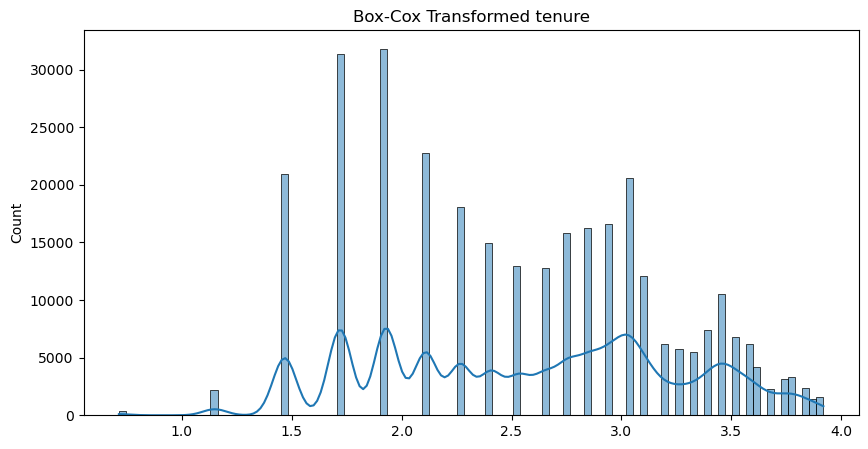

In [66]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox, _ = boxcox(df_final[df_final['clnt_tenure_yr'] < outliers_tenure]['clnt_tenure_yr'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed tenure')

In [49]:
# Conducting the Kolmogorov-Smirnov test for normality on 'SalePrice'
# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
standardized = (df_boxcox - df_boxcox.mean()) / df_boxcox.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized, 'norm')

ks_test_statistic, ks_p_value

(0.055790658507698265, 5.227864657194776e-243)

In [84]:
# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


In [69]:
df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]

,client_id,variation,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,4.0,53.0,66.0,U,2.0,93103.47,6.0,9.0


In [70]:
155091 / 3

51697.0

<Axes: xlabel='bal', ylabel='Count'>

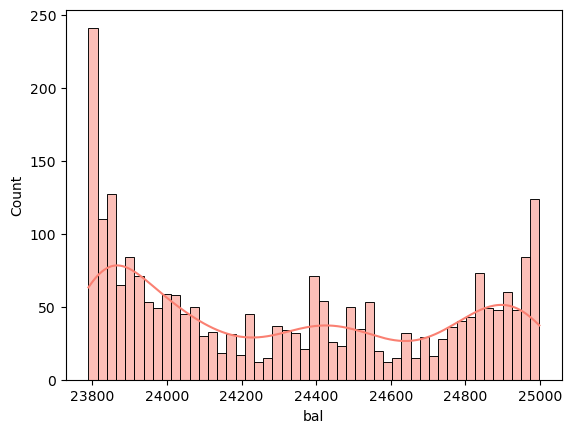

In [61]:
sns.histplot(df_bal_test_small, kde=True, bins=int(2_421 ** (1/2)), color="salmon")

Text(0.5, 1.0, 'Box-Cox Transformed bal-test-small')

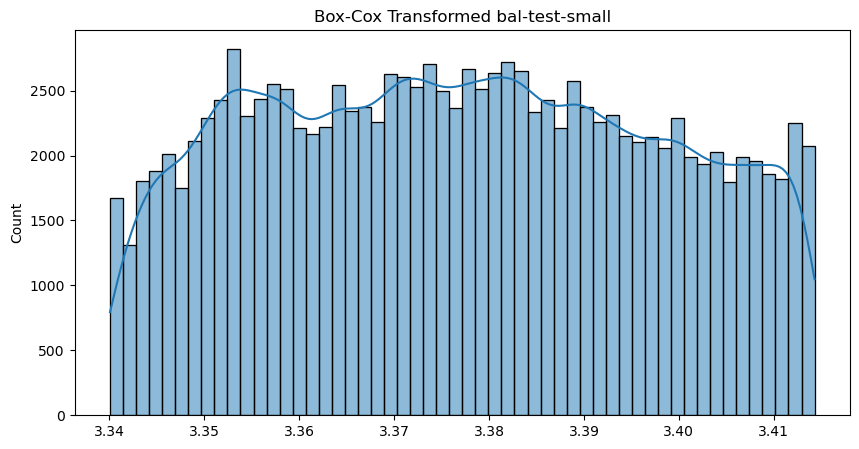

In [65]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'bal-test-small'
df_boxcox, _ = boxcox(df_bal_test_medium)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'LotArea'
sns.histplot(df_boxcox, kde=True)
plt.title('Box-Cox Transformed bal-test-small')

<Axes: xlabel='clnt_age', ylabel='bal'>

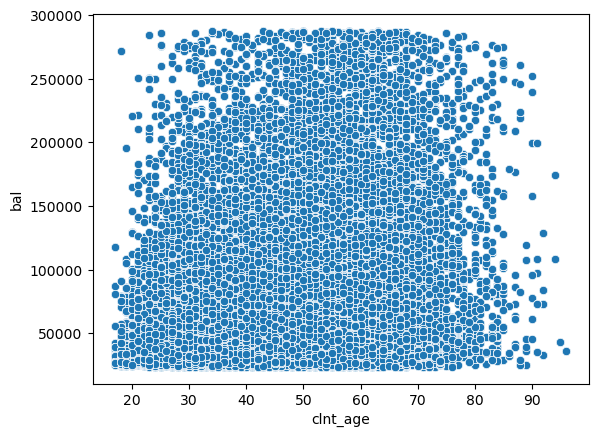

In [ ]:
# Plotting a scatter plot to visualize the relationship between 'balance' and 'client age' || valor = 'Test'


sns.scatterplot(data=df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)], x='clnt_age', y='bal')

<Axes: xlabel='bal', ylabel='Count'>

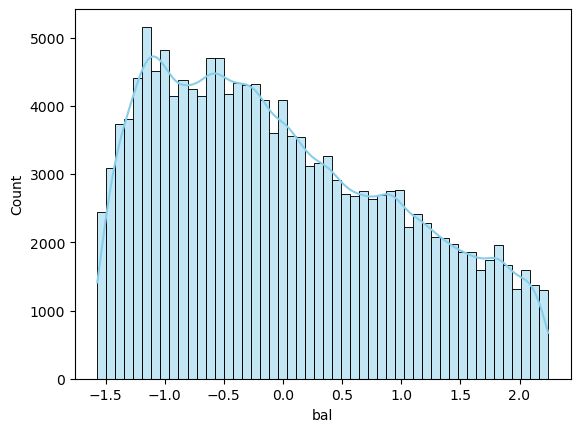

In [42]:
# Applying log transformation to 'SalePrice' and standardizing it
log_transformed_saleprice = np.log1p(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'])
standardized_log_saleprice = (log_transformed_saleprice - log_transformed_saleprice.mean()) / log_transformed_saleprice.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_saleprice, kde=True, bins=50, color="skyblue")

Text(0.5, 1.0, 'Box-Cox Transformed bal-test')

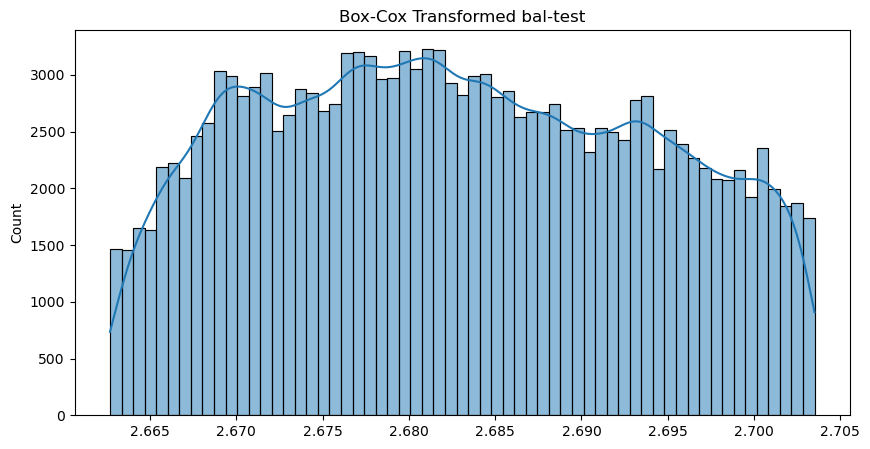

In [49]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox_bal_test, _ = boxcox(df_final[(df_final['variation'] == 'Test') & (df_final['bal'] < outliers_bal)]['bal'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox_bal_test, kde=True)
plt.title('Box-Cox Transformed bal-test')

((array([-4.44137548, -4.24667236, -4.14091368, ...,  4.14091368,
          4.24667236,  4.44137548]),
  array([2.66268481, 2.66268481, 2.66268481, ..., 2.7035051 , 2.7035051 ,
         2.7035051 ])),
 (0.01075656652955216, 2.6827358956859864, 0.9836150551313467))

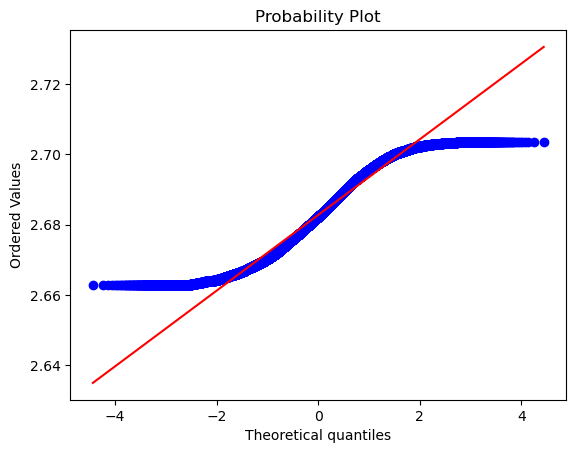

In [50]:
from scipy import stats

# Q-Q plot for transformed 'bal-test'
stats.probplot(df_boxcox_bal_test, plot=plt)

In [47]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'bal-test'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(df_boxcox_bal_test, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.9961240006148756, 0.0)

In [48]:
# print the test result
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


In [103]:
correlation = df_final[df_final['variation'] == 'Test']['bal'].corr(df_final[df_final['variation'] == 'Test']['clnt_age'], method='spearman')
correlation

0.3529022006877168

<Axes: xlabel='clnt_age', ylabel='bal'>

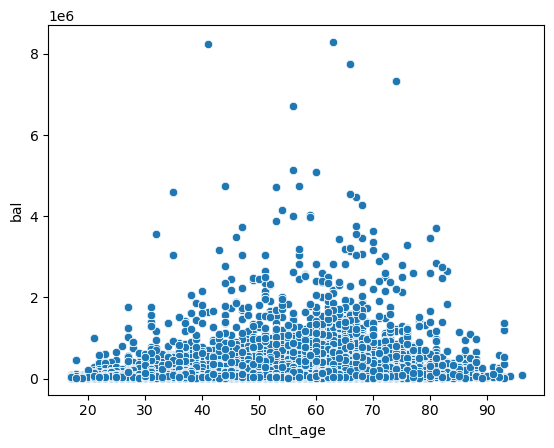

In [ ]:
# Plotting a scatter plot to visualize the relationship between 'balance' and 'client age' || valor = 'Control'

sns.scatterplot(data=df_final[df_final['variation'] == 'Control'], x='clnt_age', y='bal')

In [89]:
correlation = df_final_merge[df_final_merge['variation'] == 'Control']['bal'].corr(df_final_merge[df_final_merge['variation'] == 'Control']['clnt_age'], method='spearman')
correlation

0.33857368631230256

<Axes: xlabel='clnt_age', ylabel='Count'>

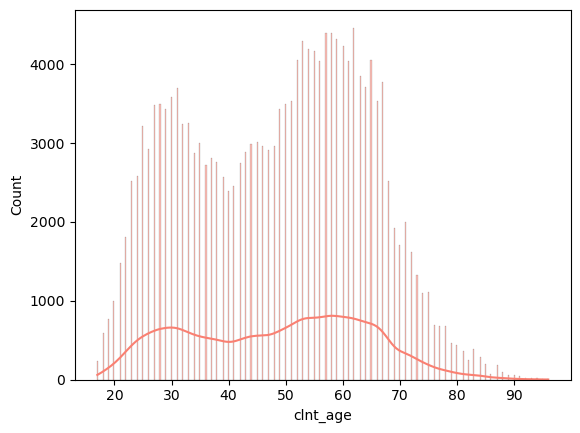

In [20]:
sns.histplot(df_final[df_final['variation'] == 'Test']['clnt_age'], kde=True, bins=int(177847 ** (1/2)), color="salmon")

Text(0.5, 1.0, 'Box-Cox Transformed age-test')

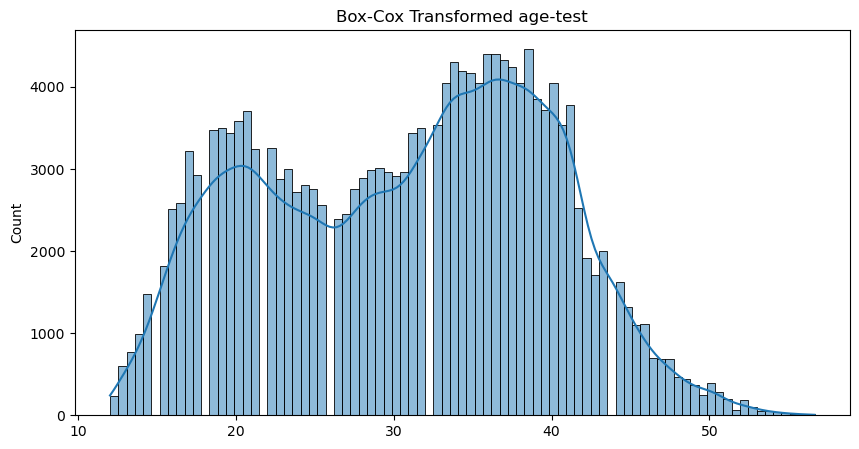

In [36]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'df_final'
df_boxcox_age_test, _ = boxcox(df_final[df_final['variation'] == 'Test']['clnt_age'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'df_final'
sns.histplot(df_boxcox_age_test, kde=True)
plt.title('Box-Cox Transformed age-test')

In [23]:
df_final[df_final['variation'] == 'Test']['clnt_age']

0         79.0
1         79.0
2         79.0
3         79.0
4         79.0
          ... 
321304    66.0
321305    66.0
321306    66.0
321307    66.0
321308    66.0
Name: clnt_age, Length: 177847, dtype: float64